#### 2.

time cost:0.05490
time cost:0.05242


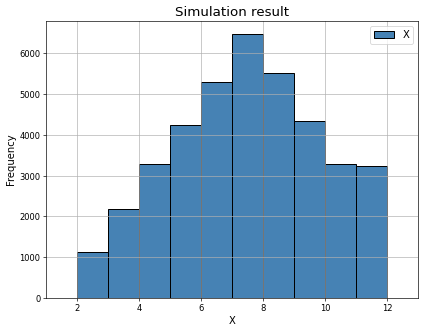

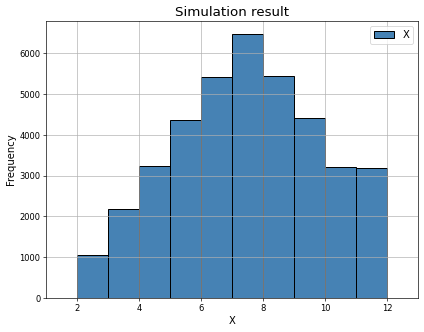

In [100]:
import math
import time
import random as rd
import matplotlib.pyplot as plt
import numpy as np

# 为归一化的概率密度函数
def f(x):
    mapping = {2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:5, 9:4, 10:3, 11:2, 12:1}
    return mapping[x]

# 均匀分布
def get_next_uniform(x_current):
    return rd.choice([2,3,4,5,6,7,8,9,10,11,12])

# 按G转移
def get_next_G(x_current):
    if x_current == 2 :
        return  rd.choice([2,3])
    elif x_current == 12:
        return rd.choice([11,12])
    else:
        return rd.choice([x_current-1,x_current+1])
    
# Metroplis算法实现
def two_dice(f, g, x_0 = 2, num = 2000):
    t = min(int(num/2),1000)
    time_begin = time.time()# 程序开始时间
    # 存储采样值
    x_current = x_0
    X = [x_current]
    
    # 主循环，选取X
    i = 0
    while i < num:
        i += 1
        x_supposed = g(x_current) # 获取建议数
        # 判断是否接受
        u = rd.uniform(0,1)
        h = min(1, f(x_supposed)/f(x_current))
        if u < h:
            x_current = x_supposed
        X.append(x_current)
     
    # 程序结束时间
    time_end = time.time()
    return X[t:],time_end-time_begin

def plot_hist(X):
    plt.figure(figsize=(8, 6), dpi=60)  
    plt.hist(X, bins = 10, color='steelblue', edgecolor='black', linewidth=1.2)  
    plt.title('Simulation result', fontsize=16)  
    plt.xlabel('X', fontsize=12)   
    plt.ylabel('Frequency', fontsize=12)  
    plt.grid(True)  
    plt.xlim(1, 13)  
    plt.legend(['X'], loc='upper right', fontsize=12) 

u = two_dice(f = f,g = get_next_uniform,x_0=6,num=40000)
G = two_dice(f = f,g = get_next_G,x_0=6,num=40000)
plot_hist(u[0])
print("time cost:{:.5f}".format(u[1]))
plot_hist(G[0])
print("time cost:{:.5f}".format(G[1]))

计算时间相差不大，准确度也基本一样，这说明选择这两种不同的建议概率密度函数对模拟产生结果不会造成影响，体现了MCMC方法的灵活性

#### 3

(6.913333333333335, 5.534023609467693)

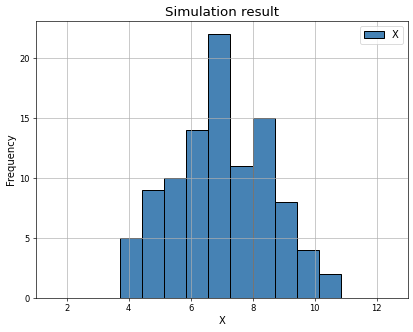

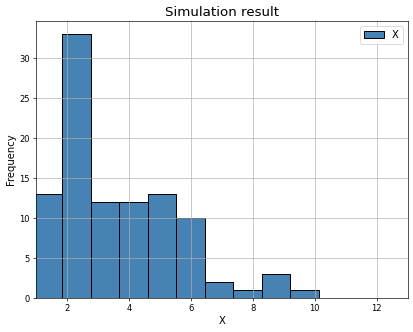

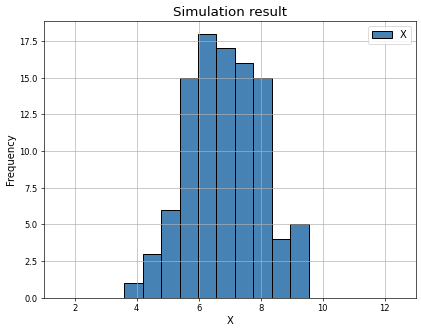

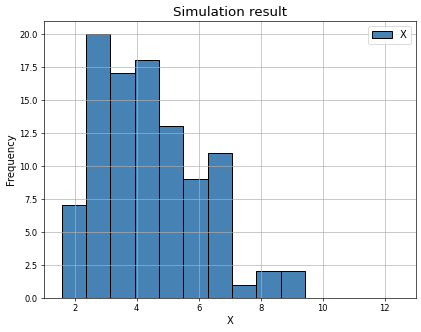

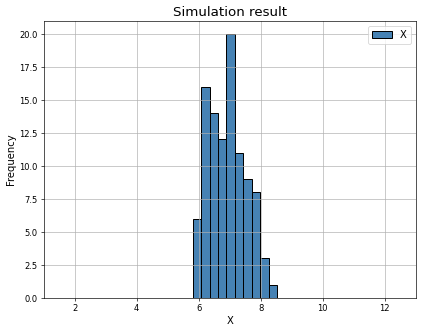

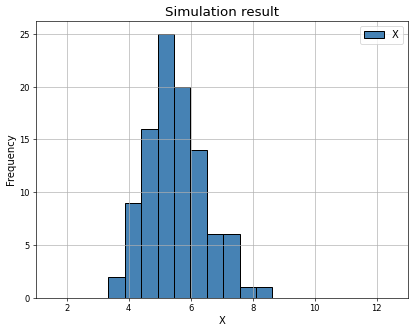

In [80]:
def question_three(instance_num, instance_size):
    Y = [two_dice(f,g = get_next_G, x_0 = 2, num=instance_size)[0] for _ in range(instance_num)]
    Y_mean = [np.mean(y) for y in Y]
    Y_var = [np.var(y) for y in Y]
    plot_hist(Y_mean)
    plot_hist(Y_var)
    return np.mean(Y_mean),np.mean(Y_var)

question_three(100, 100)
question_three(100,200)
question_three(100,1000)

#### 4

mean=3.080401,var=2.682576


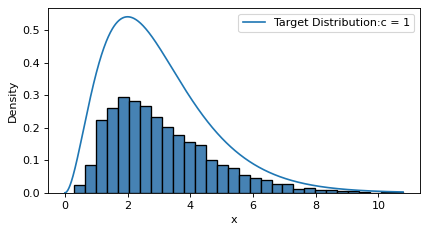

mean=3.025712,var=2.409707


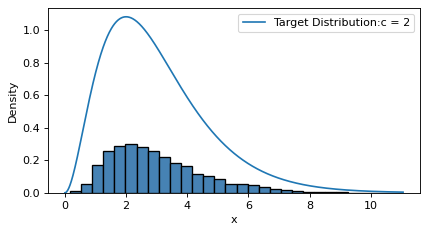

mean=2.980804,var=2.479501


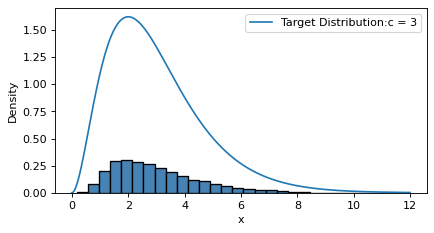

mean=3.210824,var=3.035216


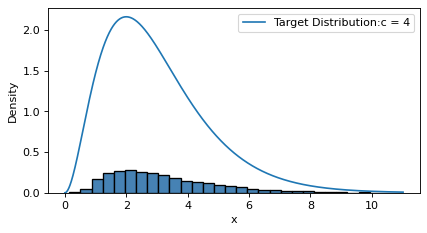

In [92]:
# 目标函数
def f(c,x):
    return c * x**2 * np.exp(-x)
# 采样
def sampling_f(x_0, delta, num, f):
    x_current = x_0
    X = [x_current]
    # 建议概率密度函数
    def get_next(x_current):
        if x_current - delta > 0:
            return rd.uniform(x_current-delta, x_current+delta)
        else:
            return rd.uniform(x_current, x_current+delta)
    i = 0
    while i < num:
        i += 1
        x_supposed = get_next(x_current)
        h = min(1,f(x_supposed)/f((x_current)))
        u = rd.uniform(0,1)
        if u < h:
            x_current = x_supposed
        X.append(x_current)
    return X
# 对不同c对应函数采样
for c in range(1, 5):  
    F = lambda x: f(c, x)  
    sample = sampling_f(x_0=1, delta=1, num=10000, f=F)  
    print("mean={:.6f},var={:.6f}".format(np.mean(sample),np.var(sample)))
    plt.figure(figsize=(6, 3), dpi=80)  
    plt.hist(sample, bins = 30,color='steelblue', edgecolor='black', linewidth=1.2, density=True)  
    y = np.linspace(0, max(sample), 1000)  
    plt.plot(y, F(y),  label='Target Distribution:c = {}'.format(c))  
    plt.xlabel('x')  
    plt.ylabel('Density')  
    plt.legend()  
    plt.show()  



#### 叙述有限状态空间下，metroplis算法收敛性

假设我们有一个有限的状态空间 $\mathcal{X}=\left\{x_1, x_2, \ldots, x_n\right\}$, 希望模拟的目标分布为 $\pi(x)$ 。
1. 初始化：选择一个初始状态 $x^{(0)}$
2. 迭代更新：对于每个迭代步骤 $t=1,2, \ldots, T$, 进行以下操作：
○从一个对称的候选分布 $q(x \mid y)$ 中抽取一个候选状态 $y$, 其中 $q(x \mid y)$ 是从状态 $x$ 转移到状态 $y$ 的概率密度函数。
○计算接受率 $\alpha\left(x^{(t-1)}, y\right)$, 根据以下公式确定是否接受候选状态 $y$ :
$$
\alpha\left(x^{(t-1)}, y\right)=\min \left(1, \frac{\pi(y) q\left(x^{(t-1)} \mid y\right)}{\pi\left(x^{(t-1)}\right) q\left(y \mid x^{(t-1)}\right)}\right)
$$

。以接受率 $\alpha\left(x^{(t-1)}, y\right)$ 作为概率接受候选状态 $y$, 即以概率 $\alpha\left(x^{(t-1)}, y\right)$ 更新状态为 $x^{(t)}=y$, 否则状态保持为 $x^{(t)}=x^{(t-1)}$ 。
3. 收敛性：当迭代步骤 $T$ 趋近于无穷大时, 对称Metropolis算法收敛到目标分布 $\pi(x)$ 。这意味着在足够长的迭代后, 采样得到的状态序列将逼近目标分布 $\pi(x)$ 。

#### 文献阅读

拒绝接受法在高维空间中不实用，因为在高维空间中概率密度往往很小，因此采样出来的点很容易被拒绝，这就造成了采样效率低下。
![image.png](./1.png)

选取合适的候选概率密度函数是关键的，选择具有对称性的g可以简化计算
![image.png](./2.png)

